# EDA_FE 과제 
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/와빅_교육세션/airbnb_listings.csv', index_col=0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,26,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [ ]:
# Q1
df.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [ ]:
# Q2
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50796 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  long

In [ ]:
data = df.isnull().sum().sort_values(ascending = False)
df_missing_num = pd.DataFrame(data, index = data.index, columns = ['missing_num'])
df_missing_num['missing_%'] = np.round((df_missing_num['missing_num'] / df.shape[0]) * 100 , 1)
df_missing_num.head(20)

,missing_num,missing_%
jurisdiction_names,50781,100.0
license,50759,99.9
square_feet,50407,99.2
monthly_price,46119,90.8
weekly_price,45411,89.4
host_response_rate,19006,37.4
host_response_time,19006,37.4
security_deposit,17325,34.1
host_acceptance_rate,14015,27.6
review_scores_location,11482,22.6


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]), <a list of 54 Text major ticklabel objects>)

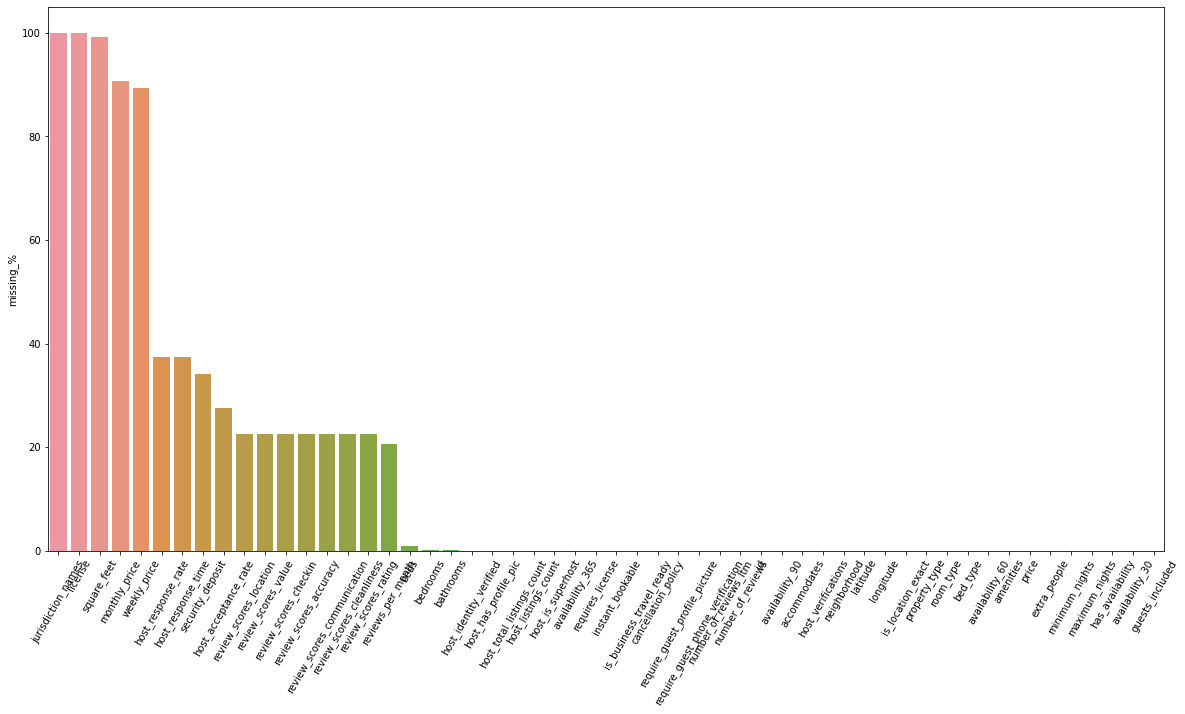

In [ ]:
# Q3
plt.figure(figsize=(20, 10))
sns.barplot(x=df_missing_num.index, y=df_missing_num['missing_%'], ci = False)
plt.xticks(rotation=60)

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다. 
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [ ]:
# Q4
df[df['beds'].isnull()].head()


,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,...,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,...,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,...,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [ ]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [ ]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다. 
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

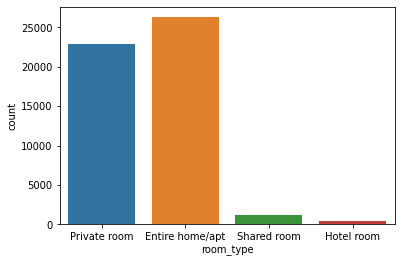

In [ ]:
# Q5
sns.countplot(x = df['room_type'])

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

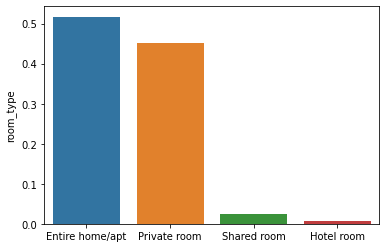

In [ ]:
# Q6
room_val_cnt = df['room_type'].value_counts()
room_val_cnt_prop = room_val_cnt / df['room_type'].shape[0]
sns.barplot(x = room_val_cnt_prop.index , y = room_val_cnt_prop, ci = False )
# sns.barplot(x = 'room_type', y = 'total_bill', data = df)

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

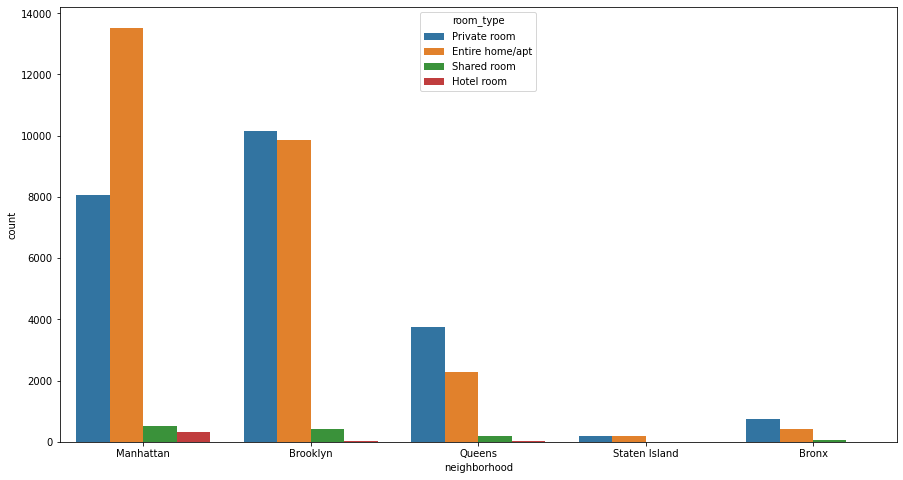

In [ ]:
# Q7
plt.figure(figsize = (15, 8))
sns.countplot(x = 'neighborhood', data = df, hue = 'room_type')

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

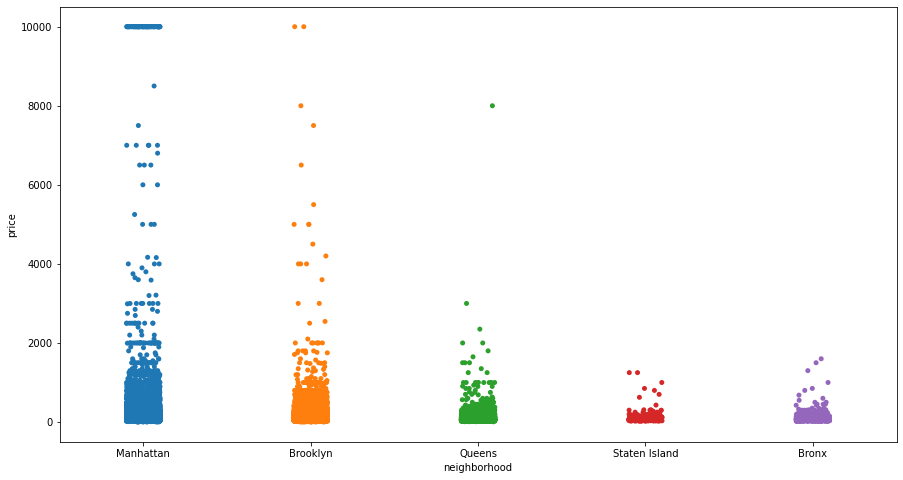

In [ ]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
plt.figure(figsize = (15, 8))
sns.stripplot(x = 'neighborhood', y = 'price', data = df)

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

In [ ]:
# Q9
# 주로 맨허튼, 브루클린, 퀸즈 등 대도시에 방이 많이 형성되어 있음을 알 수 있고 각 지역마다 private room, entire home 형태의 방으로 많이 제공되고 있음을 확인할 수 있습니다. 또한 각 지역별
# 대다수의 방 가격은 2000$ 아래로 형성되어 있음을 알수있고 몇 개의 데이터들은 outlier의 형태로 평균값들은 훨씬 넘는 값을 가지고 있음을 추측할 수 있습니다.



---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

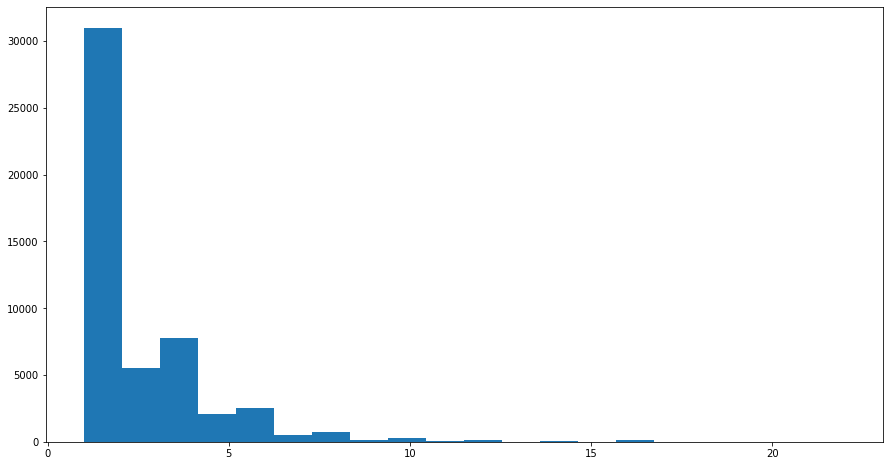

In [ ]:
# Q10
plt.figure(figsize = (15, 8))
plt.hist(x = 'accommodates', data = df, bins = 20)
plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

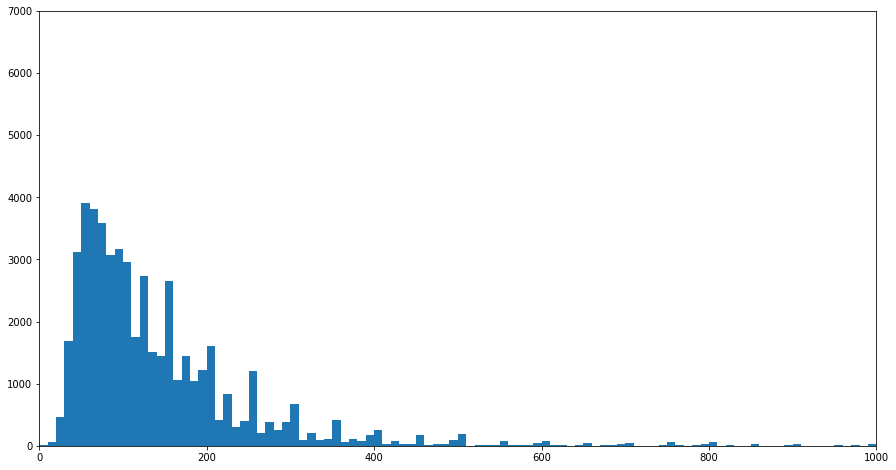

In [ ]:
# Q11
plt.figure(figsize = (15, 8))
plt.hist(x = 'price', data = df, bins = 1000)
plt.xlim([0, 1000])
plt.ylim([0, 7000])
plt.show()

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [43]:
df = pd.read_csv('/content/drive/MyDrive/와빅_교육세션/airbnb_listings.csv', index_col=0)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,26,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [44]:
#Q12
for i in df.columns:
    if df[i].isnull().sum() / df.shape[0] >= 0.25:
        df.drop([i], axis = 1, inplace = True)
    
    elif df[i].isnull().sum() / df.shape[0] < 0.25 and df[i].isnull().sum() / df.shape[0] >= 0.1:
        df = df[df[i].notnull()]
    
    else:
        df[i].fillna(df[i].iloc[int(df[i].shape[0]/2)], inplace = True)

df.isnull().sum().sum()
df.reset_index(drop = True, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39365 entries, 0 to 39364
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39365 non-null  int64  
 1   host_is_superhost                 39365 non-null  object 
 2   host_listings_count               39365 non-null  float64
 3   host_total_listings_count         39365 non-null  float64
 4   host_verifications                39365 non-null  object 
 5   host_has_profile_pic              39365 non-null  object 
 6   host_identity_verified            39365 non-null  object 
 7   neighborhood                      39365 non-null  object 
 8   latitude                          39365 non-null  float64
 9   longitude                         39365 non-null  float64
 10  is_location_exact                 39365 non-null  object 
 11  property_type                     39365 non-null  object 
 12  room

In [46]:
#Q13-1)
encoder = LabelEncoder()
encoded = encoder.fit_transform(df['room_type'])
df['room_type'] = encoded
df['room_type'].value_counts()

0    20692
2    17548
3      837
1      288
Name: room_type, dtype: int64

In [47]:
#Q13-2)
sd_scaler = StandardScaler()
sd_scaler = sd_scaler.fit_transform(df['price'].values.reshape(-1,1))
df['sd_scaled_price'] = sd_scaler
df.drop(['price'], axis = 1, inplace = True)
df['sd_scaled_price'].describe()

count    3.936500e+04
mean    -2.888018e-18
std      1.000013e+00
min     -4.260026e-01
25%     -2.357236e-01
50%     -1.461805e-01
75%      4.969495e-02
max      2.755620e+01
Name: sd_scaled_price, dtype: float64

In [48]:
#Q13-3)
encoder = LabelEncoder()
encoded = encoder.fit_transform(df['property_type'])
df['property_type'] = encoded
df['property_type'].value_counts()

1     30560
20     3445
31     1471
12     1282
24     1169
16      390
5       260
27      222
19      179
25       66
17       64
26       46
18       43
3        39
6        24
33       24
30       18
8        13
13        8
0         7
4         7
15        6
28        4
21        3
10        2
11        2
2         2
7         2
9         2
29        1
14        1
22        1
23        1
32        1
Name: property_type, dtype: int64

In [ ]:
# room_type, property_type 열은 명목현 변수(object variable)로 이루어져 있으므로 추후에 regression 등의 데이터분석을 할 때 분석 정확도를 높이기 위해 수치화 할 수 있도록 labelencoding을 진행했습니다. 
# 다른 명목형 변수들 또한 이와 같은 방식을 사용할 수 있으며 숫자의 크고작음에 따라 가중치가 부여되지 않도록 labelencoding 대신 one-hot encoding을 통해 변환하는 것이 더 효과적일 수도 있다고 
# 생각합니다. one-hot encoding을 통해 한 행을 변환하면 열 수가 명목변수의 종류 수에 따라 증가하는데 이를 단순히 dataframe에 merge해서 데이터분석을 진행하면 되는 것인지 궁금합니다.
# price 열은 수치형 변수이며 가격값이 매우 큰 값이 나오거나 작은값일 경우 추후 데이터분석의 정확도에 영향을 끼칠 수 있기 때문에 분산과 평균을 조절하는 표준화를 진행했습니다. 

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요. 
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가
</font>

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
